### Face detection

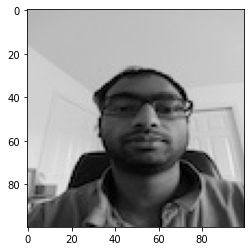

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
im = Image.open("IMG_20210921_120940978_BURST001.jpg")
plt.imshow(im)

In [17]:
sequence_of_pixels = im.getdata()
list_of_pixels = list(sequence_of_pixels)
pixel_lst = []
for i in range(len(list_of_pixels)):
    pixel_lst.append(list_of_pixels[i][0])

In [18]:
pix_arr = np.array(pixel_lst)
pix_arr = np.reshape(pix_arr, (100, 100))
pix_arr = pix_arr/255
pix_arr

array([[0.70980392, 0.70980392, 0.70980392, ..., 0.77647059, 0.77647059,
        0.77647059],
       [0.70980392, 0.70980392, 0.70980392, ..., 0.77647059, 0.77647059,
        0.77647059],
       [0.70980392, 0.70980392, 0.70980392, ..., 0.77647059, 0.77647059,
        0.77647059],
       ...,
       [0.32156863, 0.28235294, 0.23137255, ..., 0.27058824, 0.21960784,
        0.19215686],
       [0.28627451, 0.23529412, 0.19607843, ..., 0.30980392, 0.23529412,
        0.19215686],
       [0.24705882, 0.21960784, 0.20392157, ..., 0.36078431, 0.27058824,
        0.21176471]])

In [87]:
def bound_box_function(pixel_list, count1, count2, idx_list):
    for i in range(60):
        for j in range(60):
            for k in range(i+40):
                for l in range(j+40):
                    if 0 <= pixel_list[k][l] <= 160:
                        count1 += pixel_list[k][l]
                    else:
                        count2 += pixel_list[k][l]
            diff = abs(count1/255 - count2/255)
            if 11 <= diff <= 13:
                idx_list.append(tuple([i, j, diff]))
                count1 = 0
                count2 = 0
            else:
                count1 = 0
                count2 = 0
                
    return idx_list
                

In [88]:
white_pixels = 0
gray_pixels = 0
bound_box_index = []
x = bound_box_function(pix_arr, white_pixels, gray_pixels, bound_box_index)

In [89]:
minim = 0
best_index = 0
for i in range(len(x)):
    if minim == 0 or minim > x[i][2]:
        minim = x[i][2]
        best_index = tuple([x[i][0], x[i][1]])
best_index            

(28, 27)

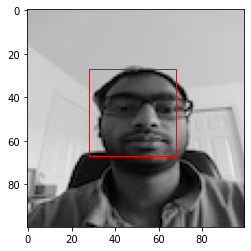

In [91]:
fig, ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((28, 27), 40, 40, linewidth=1,
                         edgecolor='r', facecolor="none")
ax.add_patch(rect)
plt.show()